# Linear Regression - multiple parameters

- https://blog.csdn.net/joker_shy/article/details/97482699

In [9]:
import numpy as np

np.set_printoptions(suppress=True,precision=3)

_data = ((2104,3,399900),
(1600,3,329900),
(2400,3,369000),
(1416,2,232000),
(3000,4,539900),
(1985,4,299900),
(1534,3,314900),
(1427,3,198999),
(1380,3,212000),
(1494,3,242500),
(1940,4,239999),
(2000,3,347000),
(1890,3,329999),
(4478,5,699900),
(1268,3,259900),
(2300,4,449900),
(1320,2,299900),
(1236,3,199900),
(2609,4,499998),
(3031,4,599000),
(1767,3,252900),
(1888,2,255000),
(1604,3,242900),
(1962,4,259900),
(3890,3,573900),
(1100,3,249900),
(1458,3,464500),
(2526,3,469000),
(2200,3,475000),
(2637,3,299900),
(1839,2,349900),
(1000,1,169900),
(2040,4,314900),
(3137,3,579900),
(1811,4,285900),
(1437,3,249900),
(1239,3,229900),
(2132,4,345000),
(4215,4,549000),
(2162,4,287000),
(1664,2,368500),
(2238,3,329900),
(2567,4,314000),
(1200,3,299000),
(852,2,179900 ),
(1852,4,299900),
(1203,3,239500))

data = np.array(_data)
data.shape


(47, 3)

In [10]:
_x = data[:,0:2]
_y = data[:,2]
print _x.shape
print _y.shape

(47, 2)
(47,)


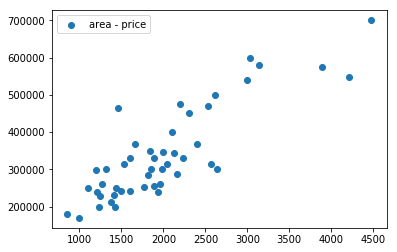

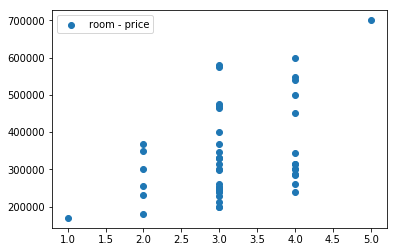

In [11]:
import matplotlib.pyplot as plt

plt.scatter(_x[:,0], _y,label='area - price')
plt.legend()
plt.show()

plt.scatter(_x[:,1], _y,label='room - price')
plt.legend()
plt.show()


In [12]:
print "std avg: ", _y.std()
print "mean: ", _y.mean()
print "min ", _y.min(), " - max ", _y.max()

std avg:  123702.5360061474
mean:  340412.6595744681
min  169900  - max  699900


In [64]:
def preProcess(x, y):
    # 进行特征缩放
    x = x - np.mean(x,axis=0)
    x /= np.std(x,axis=0,ddof=1)
    y = y - np.mean(y,axis=0)
    y /= np.std(y,axis=0,ddof=1)
    # 数据初始化
    x = np.c_[np.ones(len(x)),x]
    y = np.c_[y]
    return x,y

# 调用预处理函数
x, y = preProcess(_x, _y)

print x.shape
print y.shape


(47, 3)
(47, 1)


In [76]:
def model(x, theta):
    h = np.dot(x, theta)
    return h

def cost(h, y):
    m = len(y)
    J = 1. / (2 * m) * np.sum(np.square(h - y))
    if False:
        print "m: ", m
        print "h: ", h
        print "y: ", y
        print "J: ", J
    return J

# 定义梯度下降函数
def gradDesc(x, y, alpha = 0.01, iter_num = 4000):
    m, n = x.shape
    print(m, n)
    theta = np.zeros((n, 1))
    J_history = np.zeros(iter_num)

    for i in range(iter_num):
        h = model(x, theta)
        J_history[i] = cost(h, y)
        # theta -= alpha * 1/m * (xT * (h - y))
        deltaTheta = 1.0 / m * np.dot(x.T, h - y)
        theta -= alpha * deltaTheta
        # print i, deltaTheta
        if False:
            print "h: ", h
            print "cost: ", J_history[i]
            print "delta: ", deltaTheta
            print "theta: ", theta
        
    return J_history, theta

# 求精度
def score(h, y):
    u = np.sum(np.square(h - y))
    v = np.sum(np.square(y - np.mean(y)))
    score = 1.0 - u / v
    return score



(47, 3)
theta [[-0.   ]
 [ 0.885]
 [-0.053]]
('Score: ', 0.7329450118751362)


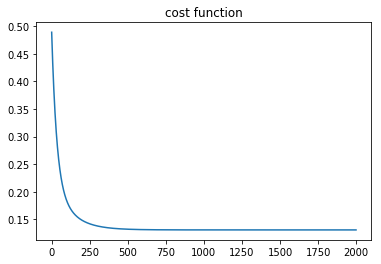

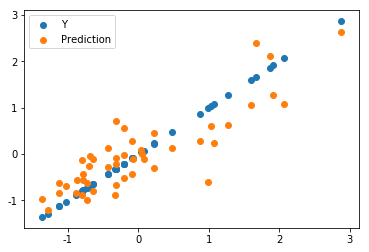

In [91]:
# 训练模型
J_history, theta = gradDesc(x, y, .01, 2000)
print "theta", theta

# Prediction result h = x * theta
h = model(x, theta)

# Acurracy Score = 1/2m * sum((h - y)**2)
print('Score: ',  score(h, y))

# print J_history 画出代价函数
plt.title('cost function')
plt.plot(J_history)
plt.show()

# 画真实值和真实值的对比图
# plt.title('训练集：真实值/预测值对比图')
plt.scatter(y, y, label='Y')
plt.scatter(y, h, label='Prediction')
plt.legend()
plt.show()


# Let's try another group of data

(50, 2)
(50, 1)


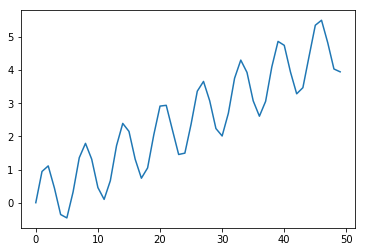

In [118]:
_x = np.arange(50.)
_y = np.sin(_x)  + _x / 10

x, y = preProcess(_x, _y)
print x.shape
print y.shape

plt.plot(_y)
plt.show()


(50, 2)
theta [[-0.   ]
 [ 0.891]]
('Score: ', 0.7940480074342401)


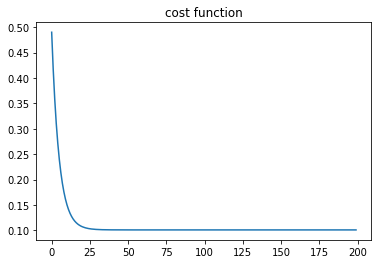

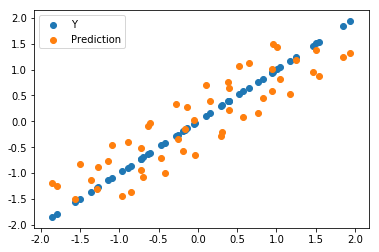

In [124]:
# 训练模型
J_history, theta = gradDesc(x, y, .1, 200)
print "theta", theta

# Prediction result h = x * theta
h = model(x, theta)

# Acurracy Score = 1/2m * sum((h - y)**2)
print('Score: ',  score(h, y))

# print J_history 画出代价函数
plt.title('cost function')
plt.plot(J_history)
plt.show()

# 画真实值和真实值的对比图
# plt.title('训练集：真实值/预测值对比图')
plt.scatter(y, y, label='Y')
plt.scatter(y, h, label='Prediction')
plt.legend()
plt.show()
